In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import json
import seaborn as sns
import random

random.seed(1301266)

In [25]:
ratePred = pd.read_csv("pred.csv")
ratePred = ratePred[["lga", "crime", "last_crime", "locationx", "locationy"]].copy()
ratePred = ratePred.rename(columns={"lga": "LGA"})
ratePred

,LGA,crime,last_crime,locationx,locationy
0,whittlesea,4362.388889,4863.661646,18.046425,17.204576
1,northerngrampians,11419.017668,10517.902844,-181.409591,75.763633
2,greatergeelong,7050.211078,7950.037374,-48.877232,-36.689912
3,colacotway,5762.459688,5754.102209,-143.760624,-63.459617
4,moorabool,4967.234812,5886.833576,-69.117859,32.161270
5,centralgoldfields,5924.385829,6768.508089,-89.848103,83.849846
6,mitchell,6581.868005,6923.713517,36.618210,58.510644
7,alpine,4443.456372,4131.937459,199.720885,121.548115
8,benalla,8580.767142,8138.300643,105.082216,132.343086
9,campaspe,9951.955147,10015.490830,-44.445947,184.254390


In [26]:
population = pd.read_csv("2024_populations.csv")
population = population[["LGA", "Population"]].copy()
population = population.rename(columns={"Population": "population"})
population

,LGA,population
0,alpine,19245
1,ballarat,119244
2,banyule,128964
3,basscoast,43355
4,bawbaw,61594
...,...,...
61,wodonga,44536
62,wyndham,333694
63,yarra,98899
64,yarraranges,159206


In [27]:
# Get the 2023 population
offences = pd.read_csv("../cleanedCsv/cleanedOffences.csv")
offences = offences[offences["Year"] == 2023]
offences["population"] = offences["Offence Count"] / offences["Rate per 100,000 population"] * 100000
offences = offences[["Local Government Area", "population"]].copy()
offences = offences.rename(columns={"Local Government Area": "LGA", "population": "last_population"})
offences

,LGA,last_population
603,alpine,19433.982435
604,ballarat,117955.637001
605,banyule,129021.945879
606,basscoast,42705.911238
607,bawbaw,60658.391797
...,...,...
665,wodonga,44290.461139
666,wyndham,323205.958098
667,yarra,98184.711183
668,yarraranges,158832.592725


In [34]:
ratePopPred = pd.merge(left=ratePred, right=population)
ratePopPred = pd.merge(left=ratePopPred, right=offences)

ratePopPred["crime_count"] = ratePopPred["crime"] * ratePopPred["population"] / 100000
ratePopPred["last_crime_count"] = ratePopPred["last_crime"] * ratePopPred["last_population"] / 100000

ratePopPred["crime_change"] = ratePopPred["crime"] - ratePopPred["last_crime"]
ratePopPred["crime_count_change"] = ratePopPred["crime_count"] - ratePopPred["last_crime_count"]
ratePopPred

,LGA,crime,last_crime,locationx,locationy,population,last_population,crime_count,last_crime_count,crime_change,crime_count_change
0,whittlesea,4362.388889,4863.661646,18.046425,17.204576,312770,307895.595770,13644.243727,14975.0,-501.272757,-1330.756273
1,northerngrampians,11419.017668,10517.902844,-181.409591,75.763633,23380,23635.890509,2669.766331,2486.0,901.114824,183.766331
2,greatergeelong,7050.211078,7950.037374,-48.877232,-36.689912,289966,285457.777538,20443.215055,22694.0,-899.826295,-2250.784945
3,colacotway,5762.459688,5754.102209,-143.760624,-63.459617,38010,38233.592661,2190.310927,2200.0,8.357479,-9.689073
4,moorabool,4967.234812,5886.833576,-69.117859,32.161270,56646,56108.261889,2813.739832,3303.0,-919.598764,-489.260168
5,centralgoldfields,5924.385829,6768.508089,-89.848103,83.849846,34032,34069.546341,2016.186985,2306.0,-844.122260,-289.813015
6,mitchell,6581.868005,6923.713517,36.618210,58.510644,82014,80708.134249,5398.053226,5588.0,-341.845512,-189.946774
7,alpine,4443.456372,4131.937459,199.720885,121.548115,19245,19433.982435,855.143179,803.0,311.518913,52.143179
8,benalla,8580.767142,8138.300643,105.082216,132.343086,56894,56842.333586,4881.941658,4626.0,442.466498,255.941658
9,campaspe,9951.955147,10015.490830,-44.445947,184.254390,48950,49123.902999,4871.482045,4920.0,-63.535682,-48.517955


In [39]:
print(len(ratePopPred[ratePopPred["crime_change"] < 0]))
print(len(ratePopPred[ratePopPred["crime_change"] > 0]))

36
20


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x243dfc77050>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x243df69e1d0>)

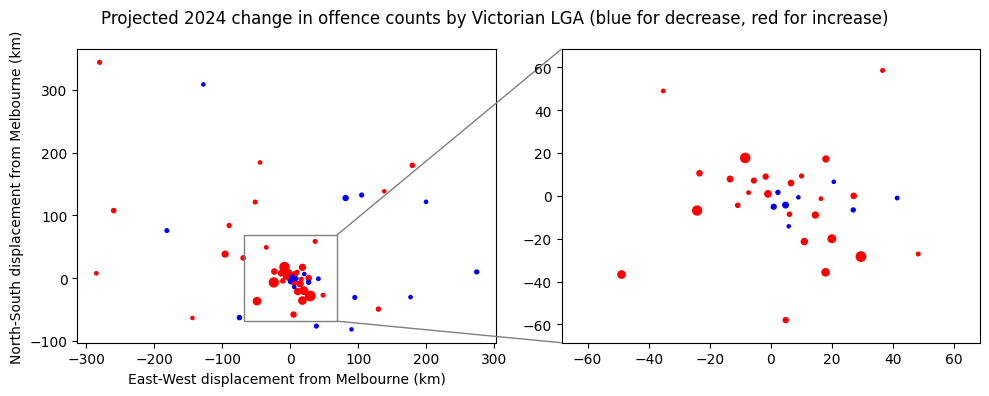

In [37]:
# Terry's bubble graph
def transformChange(change: int):
    # Transform the scale so the bubble fits the graph
    return abs(change)/1e2 + 5

import matplotlib.patches as patches

from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector 

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(
    ratePopPred['locationx'], ratePopPred['locationy'],
    s=transformChange(ratePopPred['crime_count_change']),
      c=ratePopPred['crime_count_change'] < 0,
      cmap='bwr')

axes[0].set_xlabel('East-West displacement from Melbourne (km)')
axes[0].set_ylabel('North-South displacement from Melbourne (km)')

limit = ratePopPred[(ratePopPred['locationx'].abs() < 60) & (ratePopPred['locationy'].abs() < 60)]
axes[1].scatter(
    limit['locationx'], limit['locationy'],
    s=transformChange(limit['crime_count_change']),
      c=limit['crime_count_change'] < 0,
      cmap='bwr'
)
lim = max(np.max(np.abs(limit['locationx'])), np.max(np.abs(limit['locationy'])))+10
# rect = patches.Rectangle((-lim, -lim), 2*lim, 2*lim, linewidth=2, edgecolor='black', facecolor='none')
# axes[0].add_patch(rect)

axes[1].set_xlim([-lim, lim])
axes[1].set_ylim([-lim, lim])
# axes[1].set_xlabel('East-West displacement from Melbourne (km)')
# axes[1].set_ylabel('North-South displacement from Melbourne (km)')
fig.suptitle('Projected 2024 change in offence counts by Victorian LGA (blue for decrease, red for increase)')
fig.tight_layout()

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
# loc1, loc2 : {1, 2, 3, 4} 
def mark_inset(parent_axes, inset_axes, loc1a=1, loc1b=1, loc2a=2, loc2b=2, **kwargs):
    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    parent_axes.add_patch(pp)

    p1 = BboxConnector(inset_axes.bbox, rect, loc1=loc1a, loc2=loc1b, **kwargs)
    inset_axes.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(inset_axes.bbox, rect, loc1=loc2a, loc2=loc2b, **kwargs)
    inset_axes.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

mark_inset(axes[0], axes[1], loc1a=2, loc1b=1, loc2a=3, loc2b=4, fc="none", ec="0.5")

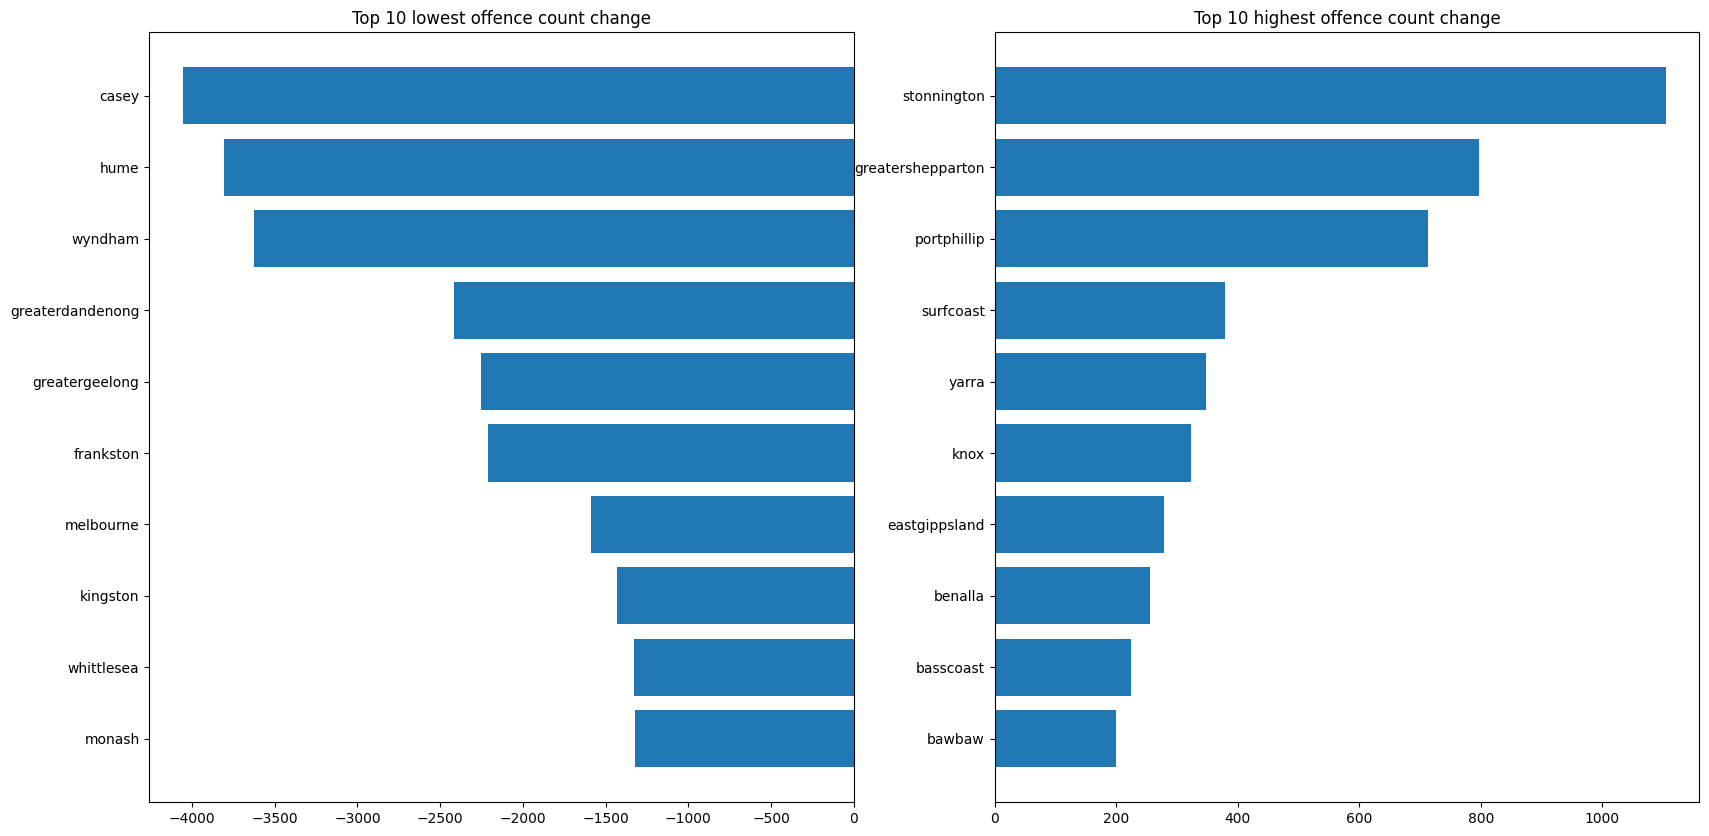

In [51]:
countChangeDf = ratePopPred[["LGA", "crime_count_change"]].copy()
countChangeDec = countChangeDf.sort_values(by = "crime_count_change", ascending=False)
countChangeInc = countChangeDf.sort_values(by = "crime_count_change", ascending=True)


fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[1].set_title("Top 10 highest offence count change")
axs[1].barh(countChangeDec.iloc[:10].iloc[::-1]["LGA"], countChangeDec.iloc[:10].iloc[::-1]["crime_count_change"])
axs[0].set_title("Top 10 lowest offence count change")
axs[0].barh(countChangeInc.iloc[:10].iloc[::-1]["LGA"], countChangeInc.iloc[:10].iloc[::-1]["crime_count_change"])

plt.show()